In [5]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cuda'

som_model = get_yolo_model(model_path='weights/omniparser/weights/best.pt')
som_model.to(device)


/home/yadonglu/sandbox/miniconda/envs/omni/lib/python3.12/site-packages/ultralytics/nn/tasks.py:714: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, ma

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [7]:

caption_model_processor = get_caption_model_processor(model_name_or_path="weights/omniparser/blipv2_ui_merge", device=device)




Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]


In [8]:
som_model.device, type(som_model) #, type(dino_model['model']), isinstance(som_model, YOLO) dino_model['model'].device, 

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [9]:

platform = 'pc'
cnt = 0
image_path = 'imgs/pc_1.png'
# image_path = 'imgs/mobile_4.png'
# get dino labeled image
if platform == 'pc':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'web':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'mobile':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
image = Image.open(image_path)
image_rgb = image.convert('RGB')

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9})
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=False)





image 1/1 /home/yadonglu/sandbox/OmniParser/imgs/pc_1.png: 800x1280 211 icons, 29.0ms
Speed: 4.1ms preprocess, 29.0ms inference, 121.1ms postprocess per image at shape (1, 3, 800, 1280)


In [10]:
label_coordinates, parsed_content_list#[0].split(': ')[1]

({'0': array([         94,          38,          95,          24], dtype=float32),
  '1': array([        628,          35,         153,          30], dtype=float32),
  '2': array([        813,          35,         125,          27], dtype=float32),
  '3': array([        985,          35,         100,          27], dtype=float32),
  '4': array([       1362,          33,          85,          29], dtype=float32),
  '5': array([       2578,          34,          77,          32], dtype=float32),
  '6': array([         38,         114,          47,          29], dtype=float32),
  '7': array([        129,         114,          80,          29], dtype=float32),
  '8': array([        241,         114,          74,          29], dtype=float32),
  '9': array([        347,         114,          70,          29], dtype=float32),
  '10': array([        445,         113,          92,          36], dtype=float32),
  '11': array([        570,         111,         133,          32], dtype=float32),
  

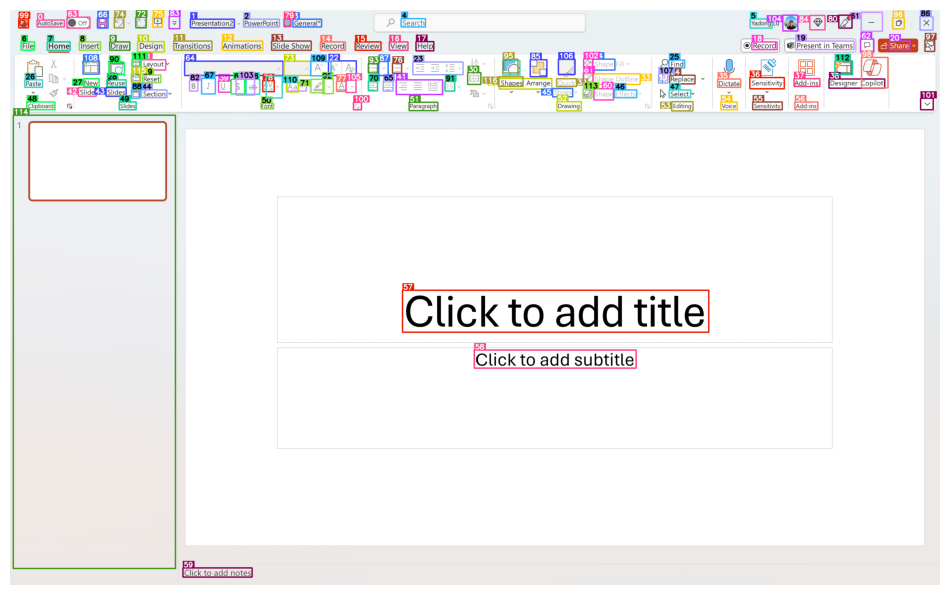

In [11]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)
